In [146]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
def link_generator(url):
    page = url
    page_base = page[:-1]
    links = []
    # generating links fpr different Review Pages
    for link in range(1,10):
        links.append(page_base+str(link))
    return links

#function to scrape Data
def Scrape(links):
    
    stars = []
    content = []
    titles = []
    
    for page in links:
        r = requests.get(page)
        soup = BeautifulSoup(r.text, 'html.parser')
        for star in soup.find_all('div', class_='ebay-review-section-l'): 
            stars.append(star.find('span','star-rating')['aria-label'])
            #logging
            # print(f"appending{star} ")
        
        for review_content in soup.find_all('p', class_ = 'review-item-content rvw-wrap-spaces'): 
            content.append(review_content.text)
            #logging
            # print(f"appending{review_content} ")
    
        for review_title in soup.find_all('h3', class_ = 'review-item-title rvw-nowrap-spaces'): 
            titles.append(review_title.text)
            #logging
            # print(f"appending{review_title} ")
            
    return stars, content, titles

In [148]:
#Data Frame for Home Entertainment Category 
df_he = []
df_he = pd.DataFrame(df_he)
#Data frame for Office Furniture Category
df_f = []
df_f = pd.DataFrame(df_f)
#Data frame for Fitness Equipment
df_fit = []
df_fit = pd.DataFrame(df_fit)

**Scrapping for Apple HomePod in the category "HOME ENTERTAINMENT"**

In [149]:
url_he = 'https://www.ebay.com/urw/Apple-HomePod-mini-Smart-Speaker-Space-Gray/product-reviews/242647970?_itm=354982116782&pgn=1'
links_he = link_generator(url_he)

In [150]:
stars, content, titles = Scrape(links_he) 

In [151]:
df_he['Review Title'] = titles
df_he['Review Content'] = content
df_he['Stars'] = stars


In [152]:
df_he.head(10)
df_he.to_csv("Home Entertaiment Category.csv")


**Scrapping for Table Mate II Adjustable Laptop Desk in the category "HOME Furniture"**

In [153]:
url_f = 'https://www.ebay.com/urw/Table-Mate-II-Adjustable-Laptop-Desk/product-reviews/1617618591?pgn=1'
links_f = link_generator(url_f)

In [154]:
stars, content, titles = Scrape(links_f) 

In [155]:
df_f['Review Title'] = titles
df_f['Review Content'] = content
df_f['Stars'] = stars


In [156]:
df_f.head(10)
df_f.to_csv("Home or office Furniture Category.csv")


**Scrapping for 11pcs Fitness Latex Resistance Bands Set Training Exercise Yoga Gym Elastic Band in the category "Fitness Equipment"**

In [157]:
url_fit = 'https://www.ebay.com/urw/11pcs-Fitness-Latex-Resistance-Bands-Set-Training-Exercise-Yoga-Gym-Elastic-Band/product-reviews/6046874871?pgn=1'
links_fit =  link_generator(url_fit)

In [158]:
stars, content, titles = Scrape(links_fit) 

In [159]:
max_length = max(len(titles), len(content), len(stars))

data = {
    'Review Title': titles + [np.nan] * (max_length - len(titles)),
    'Review Content': content + [np.nan] * (max_length - len(content)),
    'Stars': stars + [np.nan] * (max_length - len(stars))
}
df_fit = pd.DataFrame(data)


In [160]:
# df_fit['Review Title'] = titles
# df_fit['Review Content'] = content
# df_fit['Stars'] = stars


In [161]:
df_fit.head(10)
df_fit.to_csv("Fitness Category.csv")


In [162]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\huzai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**COMBINING REVIEWS AND TITLES AND PERFORMING SENTIMENT ANALYSIS**

In [163]:
df_he['Combined Review'] = df_he['Review Title'] + ' ' + df_he['Review Content']
sid = SentimentIntensityAnalyzer()
df_he['Sentiment Combined'] = df_he['Combined Review'].apply(lambda x: sid.polarity_scores(x)['compound'])
# print(df_he)
df_he.to_csv("Combined Reviews Home Entertainment.csv")
# print(df_he[['Review Title', 'Review Content', 'Sentiment Combined']])

In [164]:
df_f['Combined Review'] = df_f['Review Title'] + ' ' + df_f['Review Content']
sid = SentimentIntensityAnalyzer()
df_f['Sentiment Combined'] = df_f['Combined Review'].apply(lambda x: sid.polarity_scores(x)['compound'])
# print(df_f)
df_f.to_csv("Combined Reviews Furniture.csv")
# print(df_f[['Review Title', 'Review Content', 'Sentiment Combined']])

In [165]:

df_fit['Combined Review'] = df_fit['Review Title'].astype(str) + ' ' + df_fit['Review Content'].astype(str)
df_fit['Combined Review'] = df_fit['Combined Review'].replace({np.nan: '', 'nan': ''})

sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis, handling float values
df_fit['Sentiment Combined'] = df_fit['Combined Review'].apply(
    lambda x: sid.polarity_scores(x)['compound'] if isinstance(x, str) else np.nan
)
df_f.to_csv("Combined Reviews Fitness.csv")
# print(df_fit[['Review Title', 'Review Content', 'Sentiment Combined']])

**VISUALIZATIONS**

In [166]:
choices = ['Positive', 'Neutral', 'Negative']

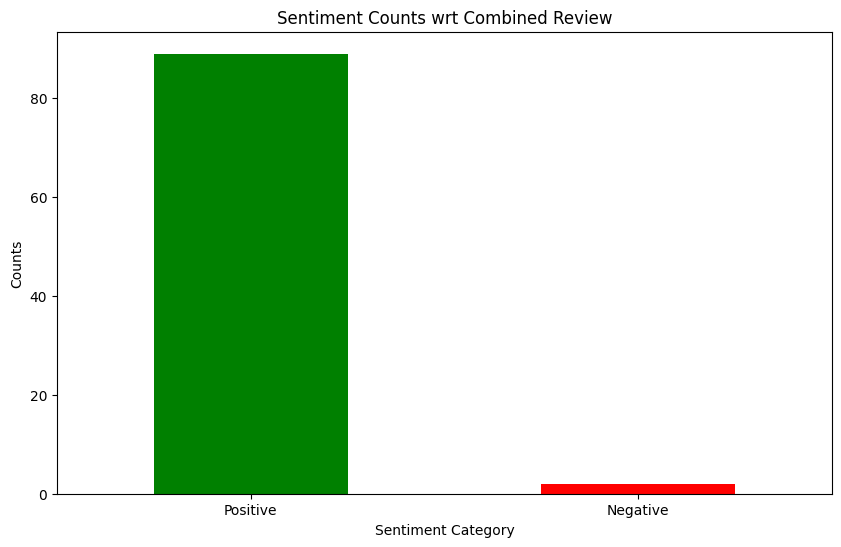

In [167]:
conditions_combined_he = [
    (df_he['Sentiment Combined'] > 0),
    (df_he['Sentiment Combined'] == 0),
    (df_he['Sentiment Combined'] < 0)
]


df_he['Sentiment_Category_Combined'] = np.select(conditions_combined_he, choices, default='Neutral')
sentiment_counts_Combined = df_he['Sentiment_Category_Combined'].value_counts()

# Plot the sentiment wrt Combined Review in a bar graph
plt.figure(figsize=(10, 6))
sentiment_counts_Combined.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Counts wrt Combined Review')
plt.xlabel('Sentiment Category')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

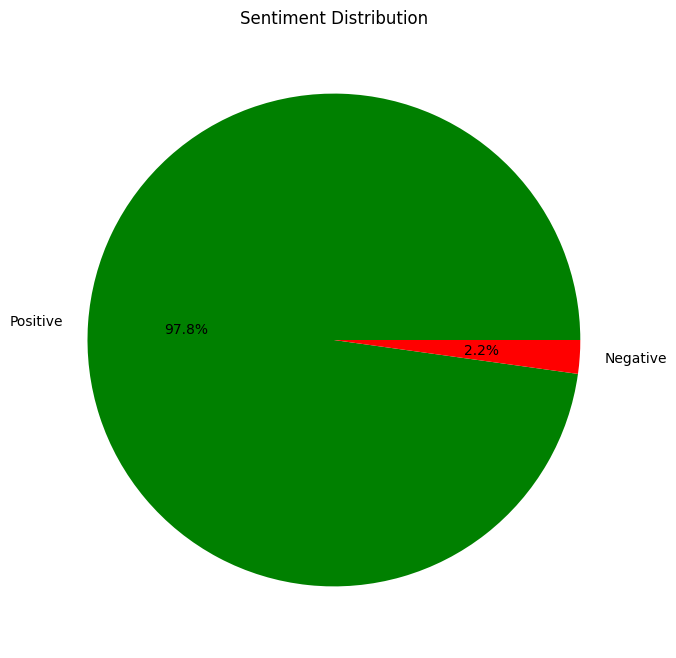

In [168]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts_Combined, labels=sentiment_counts_Combined.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.show()

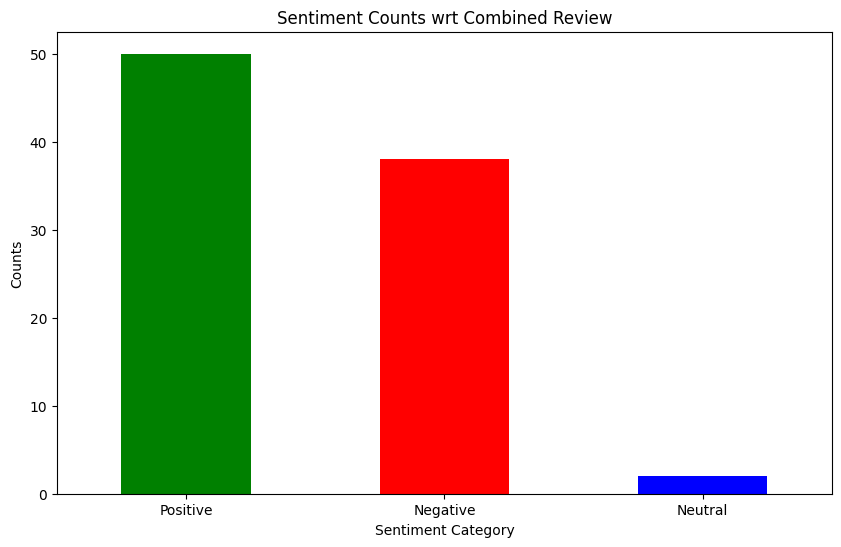

In [169]:
conditions_combined_f = [
    (df_f['Sentiment Combined'] > 0),
    (df_f['Sentiment Combined'] == 0),
    (df_f['Sentiment Combined'] < 0)
]

choices = ['Positive', 'Neutral', 'Negative']
df_f['Sentiment_Category_Combined'] = np.select(conditions_combined_f, choices, default='Neutral')
sentiment_counts_Combined = df_f['Sentiment_Category_Combined'].value_counts()

# Plot the sentiment wrt Combined Review in a bar graph
plt.figure(figsize=(10, 6))
sentiment_counts_Combined.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Counts wrt Combined Review')
plt.xlabel('Sentiment Category')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

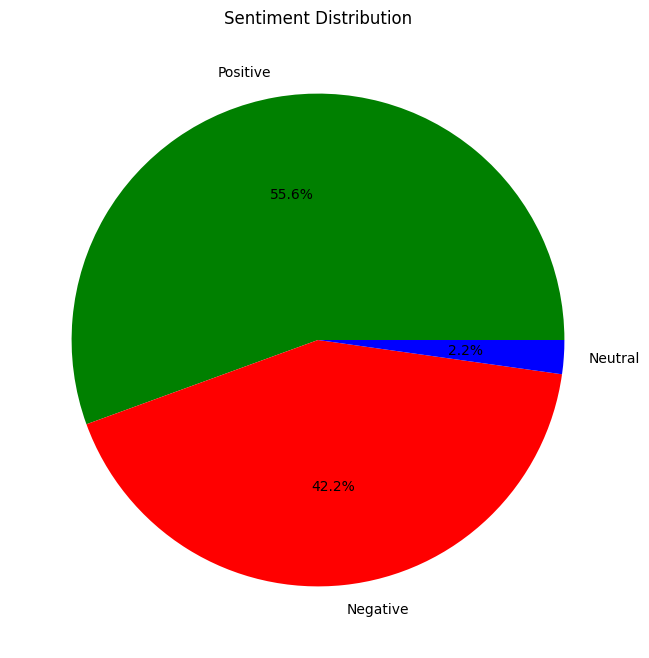

In [170]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts_Combined, labels=sentiment_counts_Combined.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.show()

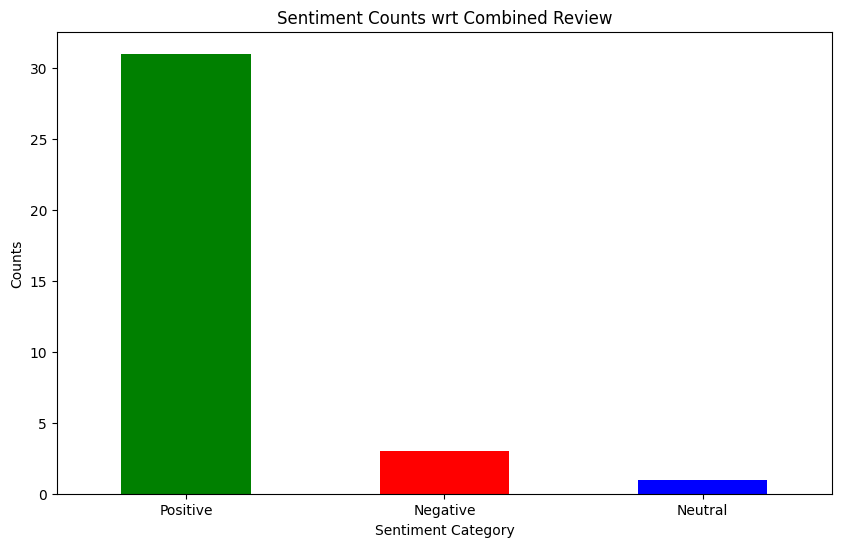

In [171]:
conditions_combined_fit = [
    (df_fit['Sentiment Combined'] > 0),
    (df_fit['Sentiment Combined'] == 0),
    (df_fit['Sentiment Combined'] < 0)
]

choices = ['Positive', 'Neutral', 'Negative']
df_fit['Sentiment_Category_Combined'] = np.select(conditions_combined_fit, choices, default='Neutral')
sentiment_counts_Combined = df_fit['Sentiment_Category_Combined'].value_counts()

# Plot the sentiment wrt Combined Review in a bar graph
plt.figure(figsize=(10, 6))
sentiment_counts_Combined.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Counts wrt Combined Review')
plt.xlabel('Sentiment Category')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

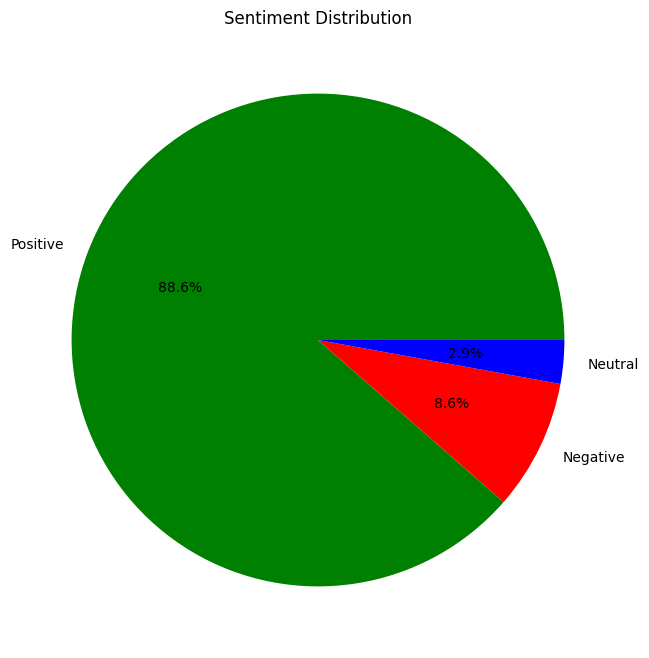

In [172]:
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts_Combined, labels=sentiment_counts_Combined.index, autopct='%1.1f%%', colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.show()